题目

姓名：方涛

笔试时间：

## 销量预测（40分）

销量预测是商品管理中的重要一环，准确的预测能够为后续的决策提供强有力的支持。准确的预测需要充分理解预测目标的情况，找出与销量相关的因子，分析相关关系，再结合销量的趋势，决定预测方案。
附件中的两张数据表分别是某食品企业的某冷饮类产品在杭州地区2014年~2016年的月批发销量数据（包含月份、销量和客户id）和这段时间内杭州的天气数据（包含日期、天气情况和日均气温），该企业在每年3月份会有大型订购会，客户在订货会期间会有大的订单。
请根据以上数据完成以下任务（请给出必要的思路和代码）：

1. 分析销量趋势，根据分析结果给出一些主要的趋势描述（8分）；
2. 针对趋势特点，根据现有数据，分析其可能的关联因素及相关关系（12分）；
3. 构建预测模型，对该产品的月销量进行预测，并给出2017年1~5月的销量预测值（12分）；
4. 构建评估指标对以上模型的结果进行评估，并给出模型改进方案及方案依据（可以是针对模型本身的改进，也可以是更多数据的支持）（8分）。


In [166]:
# 请在此解答

#2019.3.8  女神节快乐
import sys
import os

import pandas as pd
import numpy as np

import time

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
import seaborn as sns
#import matplotlib.pyplot as plt
#读取数据
sales0 = 'sales_data_month.csv'
sales = pd.read_csv(sales0, index_col=0, parse_dates=[0])
sales1 = pd.read_csv(sales0, index_col=2, parse_dates=[0])

In [144]:
sales1.head()

,date_month,quant_sell
customer_id,,
591414,2014-01-01,447
591405,2014-01-01,103
591300,2014-01-01,142
591407,2014-01-01,494
591460,2014-01-01,124


In [145]:
IDindex = []
IDJan= sales.loc['2014-01-01']
index = np.size(IDJan,0)
ID = IDJan['customer_id']
for i in range(index):
    IDindex.append(ID[i])

In [146]:
IDindex1 = list(set(IDindex))
np.size(IDindex1)

58

<function matplotlib.pyplot.show(*args, **kw)>

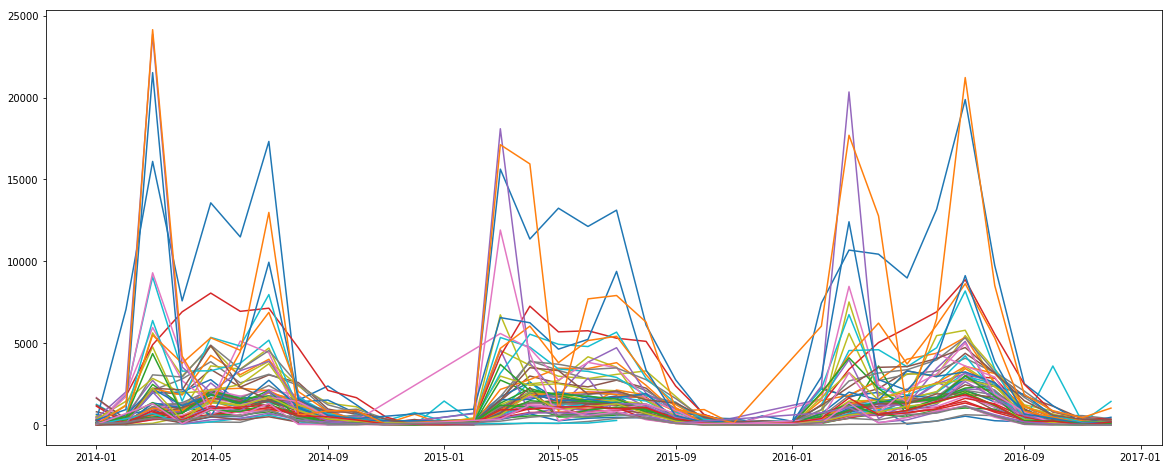

In [147]:
plt.rcParams['figure.figsize'] = (20, 8)
for i in IDindex1:
    sales_short = sales1.loc[i] 
    x = sales_short['date_month']
    y = sales_short['quant_sell']
    plt.plot(x,y)
sales_short = sales1.loc[i] 
plt.show

In [148]:
#可以初步分析每年的9月到次年1月是淡季销量峰值均出现在1月到5月之间 大部分集中在5000以下  这里应该做一些数理统计分析但是比较直观

<function matplotlib.pyplot.show(*args, **kw)>

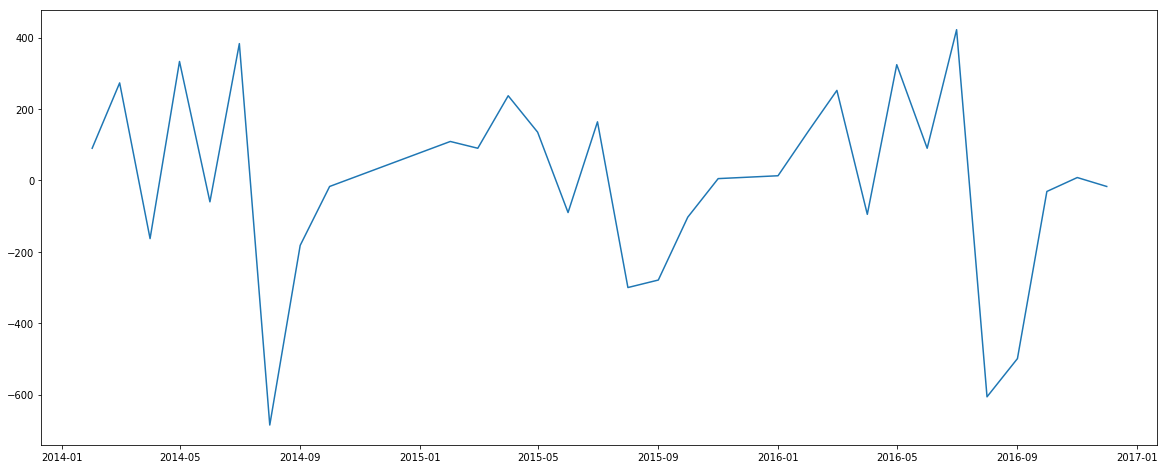

In [149]:
diff = y.diff(1)
plt.plot(x,ydiff)
plt.show
#初步考虑无法采用自相关进行预测

In [150]:
wether0 = 'whether_hangzhou.csv'
wether = pd.read_csv(wether0, index_col=0, parse_dates=[0],encoding="gbk")
wether.head()

,whether,temperature
date,,
2014-01-01,晴,16
2014-01-02,晴,17
2014-01-03,多云,16
2014-01-04,多云,12
2014-01-05,晴,12


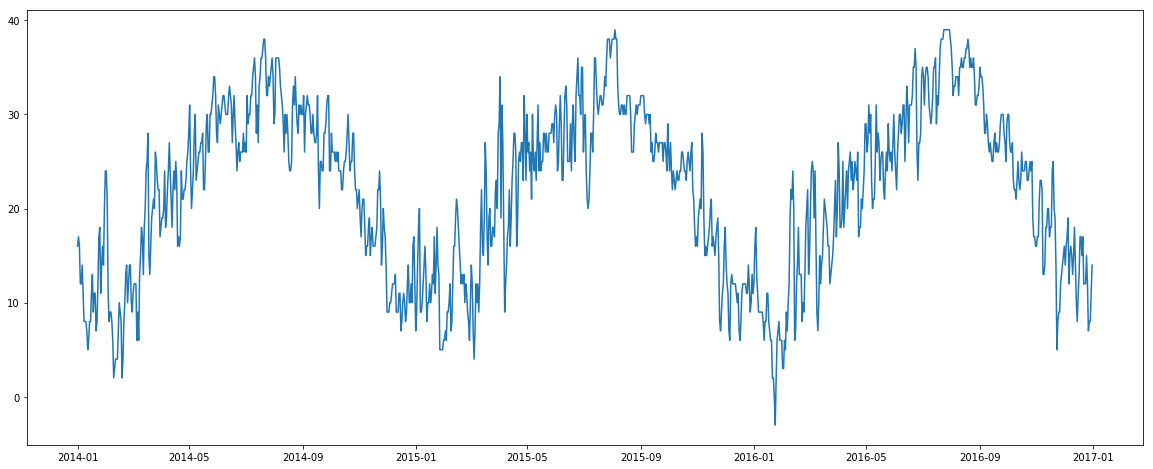

In [151]:
plt.plot(wether['temperature'])

In [152]:
#做相关性分析 先做销量与天气之间的相关性 然后在做消费者之间的相关性 为简化分析不考虑消费者之间的影响
#求每个月的气温平均值
temperature1 = wether['temperature']

Tmean = temperature1.resample('MS').mean()
Tmean.head()
Tmean


date
2014-01-01    12.000000
2014-02-01     9.214286
2014-03-01    17.000000
2014-04-01    21.300000
2014-05-01    27.225806
2014-06-01    29.000000
2014-07-01    32.935484
2014-08-01    30.387097
2014-09-01    28.233333
2014-10-01    24.903226
2014-11-01    18.100000
2014-12-01    10.709677
2015-01-01    11.290323
2015-02-01    11.857143
2015-03-01    16.064516
2015-04-01    22.866667
2015-05-01    26.645161
2015-06-01    29.200000
2015-07-01    30.709677
2015-08-01    31.774194
2015-09-01    27.966667
2015-10-01    23.483871
2015-11-01    16.766667
2015-12-01    11.096774
2016-01-01     7.612903
2016-02-01    12.758621
2016-03-01    17.032258
2016-04-01    22.333333
2016-05-01    25.709677
2016-06-01    29.400000
2016-07-01    34.967742
2016-08-01    34.548387
2016-09-01    28.433333
2016-10-01    23.580645
2016-11-01    16.500000
2016-12-01    13.516129
Freq: MS, Name: temperature, dtype: float64

In [153]:
#求每个月的气温最值
TMax = temperature1.resample('MS').max()
TMin = temperature1.resample('MS').min()

In [154]:
for i in IDindex1:
    sales_short = sales1.loc[i] 
    y = sales_short['quant_sell']
    if np.size(y,0) == 36:
        print(str(i),np.corrcoef(Tmean,y))

591381 [[1.         0.70968531]
 [0.70968531 1.        ]]
591383 [[1.         0.83338965]
 [0.83338965 1.        ]]
591385 [[1.        0.7454678]
 [0.7454678 1.       ]]
591388 [[1.         0.62855256]
 [0.62855256 1.        ]]
591390 [[1.         0.75242445]
 [0.75242445 1.        ]]
591392 [[1.         0.50824296]
 [0.50824296 1.        ]]
591394 [[1.         0.49972745]
 [0.49972745 1.        ]]
591399 [[1.        0.7819008]
 [0.7819008 1.       ]]
591401 [[1.         0.68124331]
 [0.68124331 1.        ]]
591403 [[1.         0.75834597]
 [0.75834597 1.        ]]
591405 [[1.         0.77972147]
 [0.77972147 1.        ]]
591407 [[1.        0.8299005]
 [0.8299005 1.       ]]
591282 [[1.         0.72720389]
 [0.72720389 1.        ]]
591412 [[1.         0.76978704]
 [0.76978704 1.        ]]
591541 [[1.        0.5656747]
 [0.5656747 1.       ]]
591535 [[1.         0.78176709]
 [0.78176709 1.        ]]
591416 [[1.         0.74101328]
 [0.74101328 1.        ]]
591418 [[1.         0.75136217

In [155]:
#可以看出绝大部分销量和温度的均值有极大的相关性

In [156]:
#采用SVR  
#选取ID号为591381 进行预测
sales_short = sales1.loc[591381] 
lable = sales_short['quant_sell']
print(lable.describe())
lable = np.array(lable).reshape(1,-1)
std = StandardScaler()
#将lable进行标准化
labstd = std.fit_transform(lable.T)
print(labstd)

count      36.000000
mean      619.444444
std       554.604541
min         8.000000
25%        74.500000
50%       457.500000
75%      1092.750000
max      1625.000000
Name: quant_sell, dtype: float64
[[-0.20928038]
 [-0.98463373]
 [ 0.56607296]
 [ 0.63007618]
 [ 1.83882279]
 [ 1.60658252]
 [ 1.50600602]
 [ 0.929977  ]
 [-0.61890102]
 [-0.65547429]
 [-1.03217898]
 [-1.11446884]
 [-1.09435354]
 [-1.10532552]
 [-0.01361338]
 [ 1.36702759]
 [ 1.24450713]
 [ 1.16221728]
 [ 1.10004271]
 [ 0.6794501 ]
 [-0.57684176]
 [-0.93343115]
 [-1.11812617]
 [-1.10349686]
 [-1.11081151]
 [-0.84748396]
 [-0.38300342]
 [ 0.4837831 ]
 [ 0.75808263]
 [ 0.84402982]
 [ 1.52429266]
 [ 0.30274541]
 [-0.57501309]
 [-0.90600119]
 [-1.07058091]
 [-1.09069621]]


F:\anconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
F:\anconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [157]:
#数据标准化
print(Tmean.describe())
Tmean = np.array(Tmean).reshape(1,-1)
std = StandardScaler()
#将lable进行标准化
Tmeanstd = std.fit_transform(Tmean.T)
print(Tmeanstd)


count    36.000000
mean     21.864544
std       8.078867
min       7.612903
25%      15.427419
50%      23.175269
75%      28.575000
max      34.967742
Name: temperature, dtype: float64
[[-1.23835115]
 [-1.58805737]
 [-0.61067333]
 [-0.0708704 ]
 [ 0.67302906]
 [ 0.89575345]
 [ 1.38979665]
 [ 1.06988343]
 [ 0.79950952]
 [ 0.38146259]
 [-0.47258421]
 [-1.40033253]
 [-1.32744091]
 [-1.25628481]
 [-0.72810982]
 [ 0.12580199]
 [ 0.60013745]
 [ 0.92086057]
 [ 1.11037877]
 [ 1.24401341]
 [ 0.76603337]
 [ 0.20328308]
 [-0.63996496]
 [-1.35173812]
 [-1.78908783]
 [-1.14311728]
 [-0.60662379]
 [ 0.05884969]
 [ 0.48270095]
 [ 0.94596768]
 [ 1.64491731]
 [ 1.59227336]
 [ 0.82461663]
 [ 0.21543168]
 [-0.67344111]
 [-1.04802304]]


In [158]:
#初始化SVR
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5,param_grid={"C": [1e0, 1e1, 1e2, 1e3],"gamma": np.logspace(-2, 2, 5)})
#记录训练时间
t0 = time.time()
#训练
svr.fit(Tmeanstd,labstd)
svr_fit = time.time() - t0
 
t0 = time.time()
#测试
y_svr = svr.predict(Tmeanstd)
t1= time.time() - t0
t1

F:\anconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
F:\anconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tr

F:\anconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
F:\anconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0009951591491699219

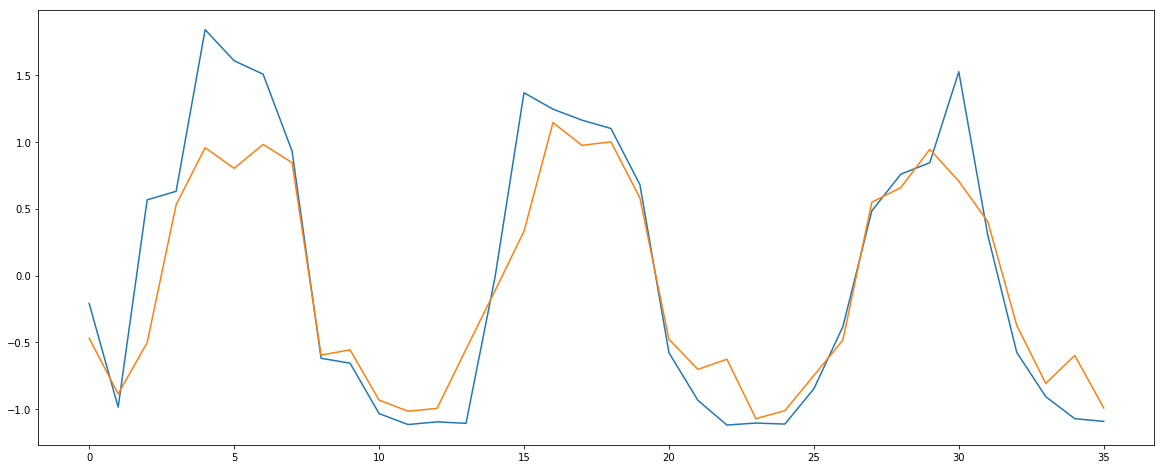

In [159]:
plt.plot(labstd)
plt.plot(y_svr)

In [160]:
wether17 = 'new.csv'
wether = pd.read_csv(wether17, index_col=0, parse_dates=[0],encoding="gbk")
wether.head()

,whether,temperature
date,,
2017-01-01,晴,17
2017-01-02,多云,16
2017-01-03,多云,16
2017-01-04,小雨,15
2017-01-05,小到中雨,13


In [161]:
x17 = wether['temperature']

Tmean17 = temperature1.resample('MS').mean()
Tmean17.head()

date
2014-01-01    12.000000
2014-02-01     9.214286
2014-03-01    17.000000
2014-04-01    21.300000
2014-05-01    27.225806
Freq: MS, Name: temperature, dtype: float64

In [162]:
print(Tmean17.describe())
Tmean = np.array(Tmean).reshape(1,-1)
std = StandardScaler()
#将lable进行标准化
Tmeanstd17 = std.fit_transform(Tmean.T)
print(Tmeanstd17)

count    36.000000
mean     21.864544
std       8.078867
min       7.612903
25%      15.427419
50%      23.175269
75%      28.575000
max      34.967742
Name: temperature, dtype: float64
[[-1.23835115]
 [-1.58805737]
 [-0.61067333]
 [-0.0708704 ]
 [ 0.67302906]
 [ 0.89575345]
 [ 1.38979665]
 [ 1.06988343]
 [ 0.79950952]
 [ 0.38146259]
 [-0.47258421]
 [-1.40033253]
 [-1.32744091]
 [-1.25628481]
 [-0.72810982]
 [ 0.12580199]
 [ 0.60013745]
 [ 0.92086057]
 [ 1.11037877]
 [ 1.24401341]
 [ 0.76603337]
 [ 0.20328308]
 [-0.63996496]
 [-1.35173812]
 [-1.78908783]
 [-1.14311728]
 [-0.60662379]
 [ 0.05884969]
 [ 0.48270095]
 [ 0.94596768]
 [ 1.64491731]
 [ 1.59227336]
 [ 0.82461663]
 [ 0.21543168]
 [-0.67344111]
 [-1.04802304]]


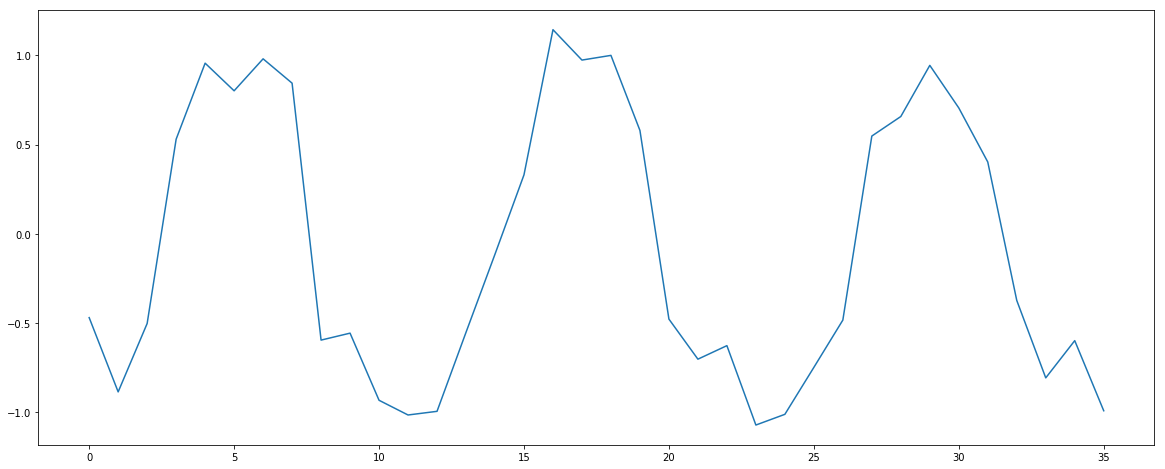

In [163]:
y_svr17 = svr.predict(Tmeanstd17)
plt.plot(y_svr17)

In [173]:
#计算预测的RMSE
MSE = mean_squared_error(labstd, y_svr)
RMSE = MSE ** 0.5
print("RMSE:", RMSE)

RMSE: 0.39996400993333975


In [174]:
#事实上从MSE看能好看点
#接下来可以考虑天气对销量的影响 或者消费者之间的影响

## 整数规划（30分)

某乳业集团有$M$个牧场和$N$个乳制品加工厂，牧场向工厂供应生奶。牧场编号用$i$表示，每个牧场每周的生奶供应量用$S_i$表示，工厂编号用$j$表示，每个工厂每周的生奶需求量用$D_j$表示，牧场$i$到工厂$j$的单位配送量运费为$C_{ij}$，每个牧场每周最多只能为$L$个工厂配送。现在需要安排牧场到工厂每周的配送计划，使得在各个工厂的需求量都得到满足的前提下，运费最低。

请对以上问题构建一个整数规划优化模型（以数学描述的形式，无需求解），包含决策变量、目标函数和约束条件，要求目标函数和约束条件必须都是**线性**的（30分）。

【加分题】请给出以上问题可解的必要条件（20分）。

提示：决策变量$Q_{ij}$表示从牧场$i$到工厂$j$的配送量。

***

M个牧场个数为$i$ &nbsp;  供应量 $S_i$  配送上限$L$


N个乳制品厂     编号为$j$   需求$D_j$

牧场$i$到工厂$j$的单位配送量运费为$C_{ij}$

$Q_{ij}$表示从牧场$i$到工厂$j$的配送量。

是否配送$m_{ij}$

$$Z_{min} = min\sum_{i=1}^{m}\sum_{j=1}^n Q_{ij}C{ij}$$

$$s.t. \begin{cases} D_j  = \sum_{i=1}^mQ_{ij}, \\ S_j  >= \sum_{j=1}^nQ_{ij}, \\m_{ij} = \ \begin{cases}1,Q_{ij}>0 \\ 0 ,Q_{ij}<0 \end{cases}\\\sum_{j=1}^n <= L\end{cases} $$

必要条件:$$\sum_{i=1}^m S_i>= \sum_{j=1}^n Dj$$